In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [2]:
def get_lower_and_upper_bounds(s, multiplier):
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper = q3 + multiplier * iqr
    lower = q1 - multiplier * iqr
    return upper, lower

2. Using lemonade.csv dataset and focusing on continuous variables:
    * Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
    * Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
    * Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
    * Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [3]:
df = pd.read_csv('lemonade.csv')
df.head(2)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13


<AxesSubplot:>

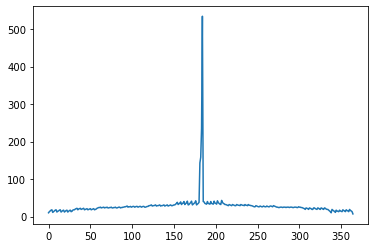

In [4]:
df.Sales.plot()

In [5]:
upper_bound_inner, lower_bound_inner = get_lower_and_upper_bounds(df.Rainfall, 1.5)
upper_bound_outer, lower_bound_outer = get_lower_and_upper_bounds(df.Rainfall, 3)
print(df[df.Rainfall > upper_bound_inner])
print(df[df.Rainfall < lower_bound_inner])
print(df[df.Rainfall > upper_bound_outer])
print(df[df.Rainfall < lower_bound_inner])

         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
11    1/12/17   Thursday         38.2      1.33      16    0.5     14
12    1/13/17     Friday         37.5      1.33      19    0.5     15
15    1/16/17     Monday         30.6      1.67      24    0.5     12
16    1/17/17    Tuesday         32.2      1.43      26    0.5     14
19    1/20/17     Friday         31.6      1.43      20    0.5     12
23    1/24/17    Tuesday         28.6      1.54      20    0.5     12
27    1/28/17   Saturday         34.9      1.33      15    0.5     13
28    1/29/17     Su

3. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
    * Use a 2 sigma decision rule to isolate the outliers.
        * Do these make sense?
        * Should certain outliers be kept or removed?

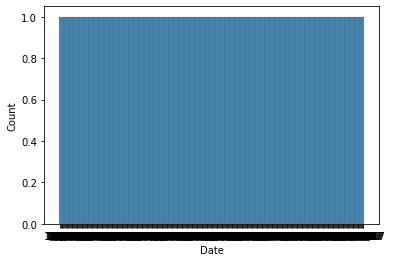

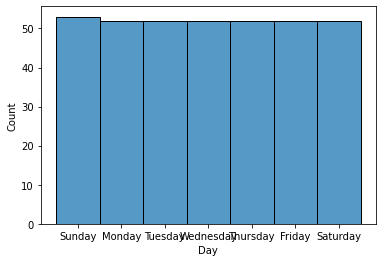

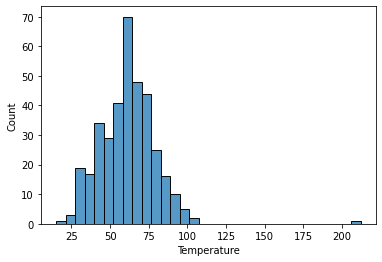

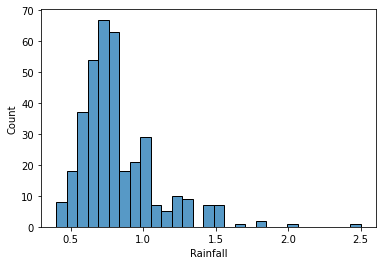

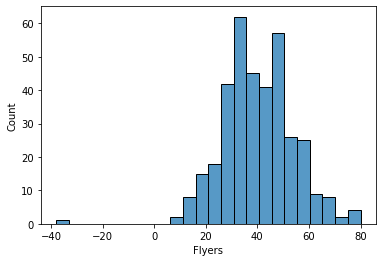

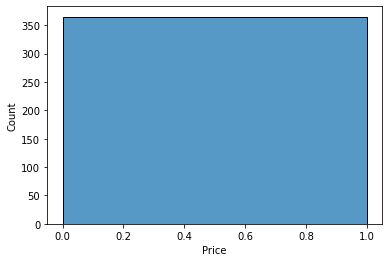

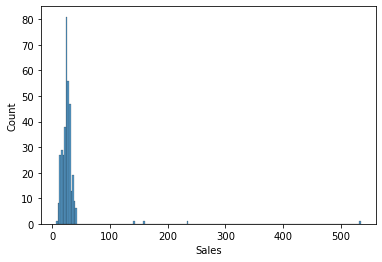

In [6]:
for col in df.columns:
    sns.histplot(df[col])
    plt.show() # Temperature, Rainfall, Flyers, and Sales all normally distributed

In [7]:
col_list = ['Temperature','Rainfall','Flyers','Sales']
for col in col_list:
    df['zscore_' + col] = (df[col] - df[col].mean()) / df[col].std()
for col in df.columns[7:]:
    print(df[df[col].abs() > 2][col])

41     8.336627
166    2.105251
176    2.287714
181    2.304301
190    2.033372
198    2.105251
202    2.121838
207    2.027843
338   -2.168799
364   -2.550311
Name: zscore_Temperature, dtype: float64
0      4.286488
5      2.606983
6      2.606983
10     2.606983
15     3.081626
16     2.205363
19     2.205363
23     2.606983
337    2.606983
338    3.629291
342    2.205363
343    3.629291
346    2.205363
347    2.606983
351    2.205363
355    2.606983
359    2.205363
363    2.205363
364    6.112037
Name: zscore_Rainfall, dtype: float64
166    2.676244
170    2.168499
171    2.603709
182    2.023429
183    2.023429
194    2.893849
198    2.603709
203    2.313569
204    2.095964
207    2.458639
324   -5.665283
338   -2.111067
364   -2.256137
Name: zscore_Flyers, dtype: float64
181     3.720233
182     4.204914
183     6.692948
184    16.354275
Name: zscore_Sales, dtype: float64


4. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [8]:
col_list = ['Temperature','Rainfall','Flyers','Sales']
for col in col_list:
    df['zscore_' + col] = (df[col] - df[col].mean()) / df[col].std()
for col in df.columns[7:]:
    print(df[df[col].abs() > 3][col])

41    8.336627
Name: zscore_Temperature, dtype: float64
0      4.286488
15     3.081626
338    3.629291
343    3.629291
364    6.112037
Name: zscore_Rainfall, dtype: float64
324   -5.665283
Name: zscore_Flyers, dtype: float64
181     3.720233
182     4.204914
183     6.692948
184    16.354275
Name: zscore_Sales, dtype: float64
